In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection, metrics, naive_bayes
%matplotlib inline

### Load

In [2]:
digits = datasets.load_digits()

In [3]:
breast_cancer = datasets.load_breast_cancer()

### Inspect digits dataset

In [4]:
digits.keys()

dict_keys(['data', 'target', 'target_names', 'images', 'DESCR'])

In [5]:
print(digits['DESCR'])

Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is a

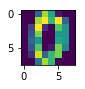

In [6]:
plt.figure(figsize=(1, 1))
plt.imshow(digits['images'][0])

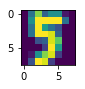

In [7]:
plt.figure(figsize=(1, 1))
plt.imshow(digits['images'][33])

In [8]:
len(digits['data'])

1797

In [9]:
digits['data'][:3]

array([[  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
         15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
          8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
          5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
          1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
          0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.],
       [  0.,   0.,   0.,  12.,  13.,   5.,   0.,   0.,   0.,   0.,   0.,
         11.,  16.,   9.,   0.,   0.,   0.,   0.,   3.,  15.,  16.,   6.,
          0.,   0.,   0.,   7.,  15.,  16.,  16.,   2.,   0.,   0.,   0.,
          0.,   1.,  16.,  16.,   3.,   0.,   0.,   0.,   0.,   1.,  16.,
         16.,   6.,   0.,   0.,   0.,   0.,   1.,  16.,  16.,   6.,   0.,
          0.,   0.,   0.,   0.,  11.,  16.,  10.,   0.,   0.],
       [  0.,   0.,   0.,   4.,  15.,  12.,   0.,   0.,   0.,   0.,   3.,
         16.,  15.,  14.,   0.,   0.,   0.,   0.,   8.,  13.

In [10]:
digits['target'][:3]

array([0, 1, 2])

### Inspect breast_cancer dataset

In [11]:
breast_cancer.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names'])

In [12]:
print(breast_cancer['DESCR'])

Breast Cancer Wisconsin (Diagnostic) Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, field
        13 is Radius SE, field 23 is Worst Radius.

        

In [13]:
breast_cancer['data'][:3]

array([[  1.79900000e+01,   1.03800000e+01,   1.22800000e+02,
          1.00100000e+03,   1.18400000e-01,   2.77600000e-01,
          3.00100000e-01,   1.47100000e-01,   2.41900000e-01,
          7.87100000e-02,   1.09500000e+00,   9.05300000e-01,
          8.58900000e+00,   1.53400000e+02,   6.39900000e-03,
          4.90400000e-02,   5.37300000e-02,   1.58700000e-02,
          3.00300000e-02,   6.19300000e-03,   2.53800000e+01,
          1.73300000e+01,   1.84600000e+02,   2.01900000e+03,
          1.62200000e-01,   6.65600000e-01,   7.11900000e-01,
          2.65400000e-01,   4.60100000e-01,   1.18900000e-01],
       [  2.05700000e+01,   1.77700000e+01,   1.32900000e+02,
          1.32600000e+03,   8.47400000e-02,   7.86400000e-02,
          8.69000000e-02,   7.01700000e-02,   1.81200000e-01,
          5.66700000e-02,   5.43500000e-01,   7.33900000e-01,
          3.39800000e+00,   7.40800000e+01,   5.22500000e-03,
          1.30800000e-02,   1.86000000e-02,   1.34000000e-02,
       

In [14]:
breast_cancer['target'][:22]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1])

In [15]:
from collections import Counter
Counter(breast_cancer['target'])

Counter({0: 212, 1: 357})

### Cross-validation

In [16]:
from sklearn.naive_bayes import BernoulliNB, MultinomialNB, GaussianNB

In [17]:
estimators = [BernoulliNB(), MultinomialNB(), GaussianNB()]

In [18]:
# expectations: MultinomialNB best for digits, GaussianNB best for breast_cancer

In [19]:
out = []

In [20]:
for dataset, dataset_name in zip([digits, breast_cancer], ['digits', 'breast_cancer']):
    for estimator, estimator_name in zip(estimators, ['BernoulliNB', 'MultinomialNB', 'GaussianNB']):
        score = np.mean(model_selection.cross_val_score(estimator, X=dataset['data'], y=dataset['target']))
        out.append([dataset_name, estimator_name, score])

In [21]:
pd.DataFrame(out, columns=['dataset', 'estimator', 'score'])

,dataset,estimator,score
0,digits,BernoulliNB,0.825824
1,digits,MultinomialNB,0.870877
2,digits,GaussianNB,0.818600
3,breast_cancer,BernoulliNB,0.627420
4,breast_cancer,MultinomialNB,0.894579
5,breast_cancer,GaussianNB,0.936749


Результаты совпали с ожиданиями

1. Каким получилось максимальное качество классификации на датасете breast_cancer?
2. Каким получилось максимальное качество классификации на датасете digits?
3. Какие утверждения из приведенных ниже верны?
    
    a. На вещественных признаках лучше всего сработал наивный байесовский классификатор с распределением Бернулли
    
    b. На вещественных признаках лучше всего сработал наивный байесовский классификатор с мультиномиальным распределением
    
    c. Мультиномиальное распределение лучше показало себя на выборке с целыми неотрицательными значениями признаков
    
    d. На вещественных признаках лучше всего сработало нормальное распределение

1. 0.936749
2. 0.870877
3. c, d